In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
0,0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147,False,"['``', 'i', 'have', 'used', 'restasis', 'for',...","['used', 'restasis', 'year', 'seen', 'almost',...","['i', 'have', 'used', 'restasis', 'for', 'abou...","['used', 'restasis', 'year', 'seen', 'almost',...","[('used', 'VBN'), ('restasis', 'NN'), ('year',...","['use', 'restasis', 'year', 'see', 'almost', '..."
1,1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136,False,"['``', 'my', 'experience', 'has', 'been', 'som...","['experience', 'somewhat', 'mixed', 'using', '...","['my', 'experience', 'has', 'been', 'somewhat'...","['experience', 'somewhat', 'mixed', 'using', '...","[('experience', 'NN'), ('somewhat', 'RB'), ('m...","['experience', 'somewhat', 'mixed', 'use', 'im..."
2,2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140,False,"['``', 'this', 'is', 'my', 'second', 'implanon...","['second', 'implanon', 'would', 'recommend', '...","['this', 'is', 'my', 'second', 'implanon', 'wo...","['second', 'implanon', 'would', 'recommend', '...","[('second', 'JJ'), ('implanon', 'NN'), ('would...","['second', 'implanon', 'would', 'recommend', '..."
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104,False,"['``', 'i', 'recommend', 'taking', 'as', 'pres...","['recommend', 'taking', 'prescribed', 'bottle'...","['i', 'recommend', 'taking', 'as', 'prescribed...","['recommend', 'taking', 'prescribed', 'bottle'...","[('recommend', 'NN'), ('taking', 'VBG'), ('pre...","['recommend', 'take', 'prescribed', 'bottle', ..."
4,4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74,False,"['``', 'i', 'have', 'been', 'on', 'ampyra', 'f...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","['i', 'have', 'been', 'on', 'ampyra', 'for', '...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","[('ampyra', 'RB'), ('5', 'CD'), ('days', 'NNS'...","['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109677,806,140111,Asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,"September 14, 2016",18,141,False,"['``', 'i', 'had', 'tried', 'many', 'medicatio...","['tried', 'many', 'medications', 'level', 'bip...","['i', 'had', 'tried', 'many', 'medications', '...","['tried', 'many', 'medications', 'level', 'bip...","[('tried', 'VBD'), ('many', 'JJ'), ('medicatio...","['try', 'many', 'medication', 'level', 'bipola..."
109678,807,103534,Synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,"October 27, 2014",61,124,False,"['``', 'had', 'partial', 'thyroid', 'removal',...","['partial', 'thyroid', 'removal', 'benign', 't...","['had', 'partial', 'thyroid', 'removal', 'with...","['partial', 'thyroid', 'removal', 'benign', 't...","[('partial', 'JJ'), ('thyroid', 'NN'), ('remov...","['partial', 'thyroid', 'removal', 'benign', 't..."
109679,808,161014,Risperidone,depression,"""my experience with risperdal started when i f...",8.0,"September 2, 2015",21,130,False,"['``', 'my', 'experience', 'with', 'risperdal'...","['experience', 'risperdal', 'started', 'first'...","['my', 'experience', 'with', 'risperdal', 'sta...","['experience', 'risperdal', 'started', 'first'...","[('experience', 'NN'), ('risperdal', 'NN'), ('...","['experience', 'risperdal', 'start', 'first', ..."
109680,809,132424,Ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,"March 30, 2009",47,77,False,"['``', 'my', 'elderly', 'dad', 'was', 'prescri...","['elderly', 'dad', 'prescribed', 'low

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
filtered_conditions = df[df['condition'].str.contains('</span>', na=False)]
filtered_conditions

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
150,168131,Jolessa,4</span> users found this comment helpful.,"""i am almost on my third month of my first pac...",5.0,"April 25, 2011",4,80,False,"['``', 'i', 'am', 'almost', 'on', 'my', 'third...","['almost', 'third', 'month', 'first', 'pack', ...","['i', 'am', 'almost', 'on', 'my', 'third', 'mo...","['almost', 'third', 'month', 'first', 'pack', ...","[('almost', 'RB'), ('third', 'JJ'), ('month', ...","['almost', 'third', 'month', 'first', 'pack', ..."
260,124318,Skyla,3</span> users found this comment helpful.,"""never pregnant,28,retroverted small (6cm) ute...",1.0,"December 16, 2015",3,103,False,"['``', 'never', 'pregnant,28', ',', 'retrovert...","['never', 'pregnant 28', 'retroverted', 'small...","['never', 'pregnant 28', 'retroverted', 'small...","['never', 'pregnant 28', 'retroverted', 'small...","[('never', 'RB'), ('pregnant 28', 'NN'), ('ret...","['never', 'pregnant 28', 'retrovert', 'small',..."
1158,33552,Microgestin Fe 1 / 20,7</span> users found this comment helpful.,"""i was on junel fe 1/20 and randomly got switc...",3.0,"March 12, 2013",7,128,False,"['``', 'i', 'was', 'on', 'junel', 'fe', '1/20'...","['junel', 'fe', '1 20', 'randomly', 'got', 'sw...","['i', 'was', 'on', 'junel', 'fe', '1 20', 'and...","['junel', 'fe', '1 20', 'randomly', 'got', 'sw...","[('junel', 'NN'), ('fe', 'VBZ'), ('1 20', 'CD'...","['junel', 'fe', '1 20', 'randomly', 'get', 'sw..."
1333,230508,Depo-Provera,2</span> users found this comment helpful.,"""i loved how convenient the shot was and how c...",6.0,"May 18, 2012",2,131,False,"['``', 'i', 'loved', 'how', 'convenient', 'the...","['loved', 'convenient', 'shot', 'cheap', 'pay'...","['i', 'loved', 'how', 'convenient', 'the', 'sh...","['loved', 'convenient', 'shot', 'cheap', 'pay'...","[('loved', 'VBN'), ('convenient', 'NN'), ('sho...","['love', 'convenient', 'shot', 'cheap', 'pay',..."
1336,33054,Seasonique,1</span> users found this comment helpful.,"""i have been taking this birth control for two...",10.0,"January 11, 2011",1,37,False,"['``', 'i', 'have', 'been', 'taking', 'this', ...","['taking', 'birth', 'control', 'two', 'years',...","['i', 'have', 'been', 'taking', 'this', 'birth...","['taking', 'birth', 'control', 'two', 'years',...","[('taking', 'VBG'), ('birth', 'NN'), ('control...","['take', 'birth', 'control', 'two', 'year', 'l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109019,204288,Dantrium,98</span> users found this comment helpful.,"""i was hit by an uninsured drunk driver in '90...",10.0,"December 25, 2008",98,141,False,"['``', 'i', 'was', 'hit', 'by', 'an', 'uninsur...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",...","['i', 'was', 'hit', 'by', 'an', 'uninsured', '...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",...","[('hit', 'NN'), ('uninsured', 'JJ'), ('drunk',...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",..."
109223,9942,Lo Loestrin Fe,17</span> users found this comment helpful.,"""this is the first birth control i have ever b...",10.0,"November 23, 2013",17,141,False,"['``', 'this', 'is', 'the', 'first', 'birth', ...","['first', 'birth', 'control', 'ever', 'absolut...","['this', 'is', 'the', 'first', 'birth', 'contr...","['first', 'birth', 'control', 'ever', 'absolut...","[('first', 'RB'), ('birth', 'NN'), ('control',...","['first', 'birth', 'control', 'ever', 'absolut..."
109288,168173,Jolessa,3</span> users found this comment helpful.,"""i have been on jolessa for three years. i hav...",5.0,"October 16, 2011",3,43,False,"['``', 'i', 'have', 'been', 'on', 'jolessa', '...","['jolessa', 'three', 'years', 'loved', 'howeve...","['i', 'have', 'been', 'on', 'jolessa', 'for', ...","['jolessa', 'three', 'years', 'loved', 'howeve...","[('jolessa', 'NN'), ('three', 'CD'), ('years',...","['jolessa', 'three', 'year', 'love', 'however'..."
109444,76177,Po

In [6]:
# Xóa tất cả các thẻ HTML kiểu </span> trong cột 'condition'
df['condition'] = df['condition'].str.replace('</span>', '', regex=False)
df['condition'] = df['condition'].str.strip()

In [7]:
df

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147,False,"['``', 'i', 'have', 'used', 'restasis', 'for',...","['used', 'restasis', 'year', 'seen', 'almost',...","['i', 'have', 'used', 'restasis', 'for', 'abou...","['used', 'restasis', 'year', 'seen', 'almost',...","[('used', 'VBN'), ('restasis', 'NN'), ('year',...","['use', 'restasis', 'year', 'see', 'almost', '..."
1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136,False,"['``', 'my', 'experience', 'has', 'been', 'som...","['experience', 'somewhat', 'mixed', 'using', '...","['my', 'experience', 'has', 'been', 'somewhat'...","['experience', 'somewhat', 'mixed', 'using', '...","[('experience', 'NN'), ('somewhat', 'RB'), ('m...","['experience', 'somewhat', 'mixed', 'use', 'im..."
2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140,False,"['``', 'this', 'is', 'my', 'second', 'implanon...","['second', 'implanon', 'would', 'recommend', '...","['this', 'is', 'my', 'second', 'implanon', 'wo...","['second', 'implanon', 'would', 'recommend', '...","[('second', 'JJ'), ('implanon', 'NN'), ('would...","['second', 'implanon', 'would', 'recommend', '..."
3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104,False,"['``', 'i', 'recommend', 'taking', 'as', 'pres...","['recommend', 'taking', 'prescribed', 'bottle'...","['i', 'recommend', 'taking', 'as', 'prescribed...","['recommend', 'taking', 'prescribed', 'bottle'...","[('recommend', 'NN'), ('taking', 'VBG'), ('pre...","['recommend', 'take', 'prescribed', 'bottle', ..."
4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74,False,"['``', 'i', 'have', 'been', 'on', 'ampyra', 'f...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","['i', 'have', 'been', 'on', 'ampyra', 'for', '...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","[('ampyra', 'RB'), ('5', 'CD'), ('days', 'NNS'...","['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109677,140111,Asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,"September 14, 2016",18,141,False,"['``', 'i', 'had', 'tried', 'many', 'medicatio...","['tried', 'many', 'medications', 'level', 'bip...","['i', 'had', 'tried', 'many', 'medications', '...","['tried', 'many', 'medications', 'level', 'bip...","[('tried', 'VBD'), ('many', 'JJ'), ('medicatio...","['try', 'many', 'medication', 'level', 'bipola..."
109678,103534,Synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,"October 27, 2014",61,124,False,"['``', 'had', 'partial', 'thyroid', 'removal',...","['partial', 'thyroid', 'removal', 'benign', 't...","['had', 'partial', 'thyroid', 'removal', 'with...","['partial', 'thyroid', 'removal', 'benign', 't...","[('partial', 'JJ'), ('thyroid', 'NN'), ('remov...","['partial', 'thyroid', 'removal', 'benign', 't..."
109679,161014,Risperidone,depression,"""my experience with risperdal started when i f...",8.0,"September 2, 2015",21,130,False,"['``', 'my', 'experience', 'with', 'risperdal'...","['experience', 'risperdal', 'started', 'first'...","['my', 'experience', 'with', 'risperdal', 'sta...","['experience', 'risperdal', 'started', 'first'...","[('experience', 'NN'), ('risperdal', 'NN'), ('...","['experience', 'risperdal', 'start', 'first', ..."
109680,132424,Ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,"March 30, 2009",47,77,False,"['``', 'my', 'elderly', 'dad', 'was', 'prescri...","['elderly', 'dad', 'prescribed', 'low', 'dose'...","['my', 'elderly', 'dad', '

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109682 entries, 0 to 109681
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_id                109682 non-null  int64  
 1   drugName                  109682 non-null  object 
 2   condition                 109682 non-null  object 
 3   review                    109682 non-null  object 
 4   rating                    109682 non-null  float64
 5   date                      109682 non-null  object 
 6   usefulCount               109682 non-null  int64  
 7   review_length             109682 non-null  int64  
 8   contains_non_ascii        109682 non-null  bool   
 9   tokens                    109682 non-null  object 
 10  token_clean               109682 non-null  object 
 11  token_clean_contracted    109682 non-null  object 
 12  token_clean_no_stopwords  109682 non-null  object 
 13  pos_tagged                109682 non-null  o

Vì cột lemmatized là dạng list (['use', 'restasis', 'year', ...]), cần nối lại thành chuỗi:

In [9]:
df['text'] = df['lemmatized'].apply(lambda x: ''.join(x))

In [10]:
df['text']

,text
0,"['use', 'restasis', 'year', 'see', 'almost', '..."
1,"['experience', 'somewhat', 'mixed', 'use', 'im..."
2,"['second', 'implanon', 'would', 'recommend', '..."
3,"['recommend', 'take', 'prescribed', 'bottle', ..."
4,"['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...
109677,"['try', 'many', 'medication', 'level', 'bipola..."
109678,"['partial', 'thyroid', 'removal', 'benign', 't..."
109679,"['experience', 'risperdal', 'start', 'first', ..."
109680,"['elderly', 'dad', 'prescribe', 'low', 'dose',..."


In [11]:
import ast

def fix_text(text_string):
    try:
        # Chuyển chuỗi thành list
        token_list = ast.literal_eval(text_string)
        # Gộp lại từng từ (bỏ khoảng trắng giữa ký tự)
        fixed_tokens = [''.join(token.split()) for token in token_list]
        return ' '.join(fixed_tokens)
    except:
        return ''

df['text_cleaned'] = df['text'].apply(fix_text)

df['text_cleaned']

,text_cleaned
0,use restasis year see almost progress life red...
1,experience somewhat mixed use implanon nearly ...
2,second implanon would recommend first one okay...
3,recommend take prescribed bottle usually say t...
4,ampyra 5 day happy new pill first 2 day good s...
...,...
109677,try many medication level bipolar disorder rel...
109678,partial thyroid removal benign tumor 30 year a...
109679,experience risperdal start first start see psy...
109680,elderly dad prescribe low dose ativan anxiety ...


Kiểm tra phân bố Rating

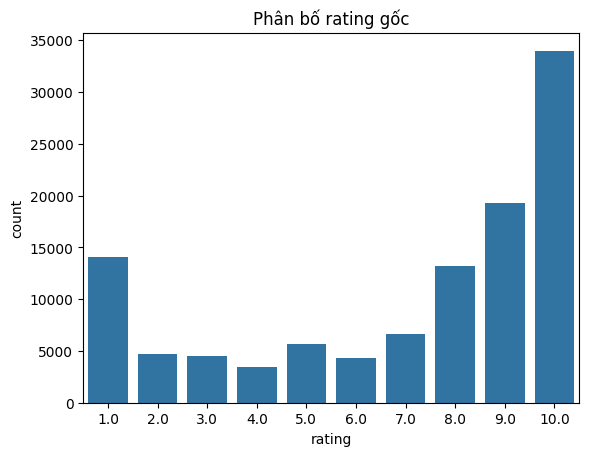

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='rating')
plt.title("Phân bố rating gốc")
plt.show()

In [13]:
def map_sentiment(rating):
    if rating >= 5:
        return 'positive'
    else:
        return 'negative'


df['sentiment'] = df['rating'].apply(map_sentiment)

<Axes: xlabel='sentiment', ylabel='count'>

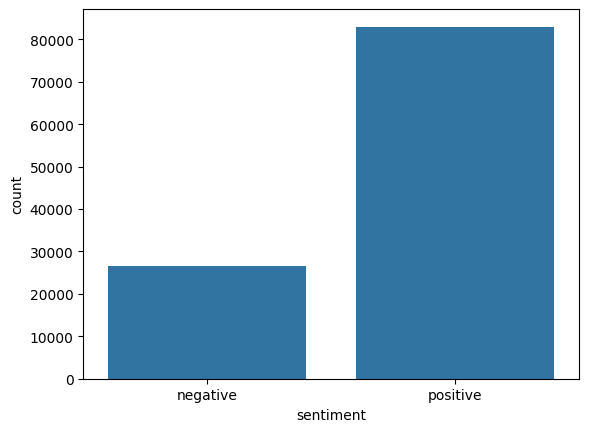

In [14]:
import seaborn as sns
sns.countplot(data=df, x='sentiment')


In [15]:
print(df['sentiment'].value_counts())

sentiment
positive    82994
negative    26688
Name: count, dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109682 entries, 0 to 109681
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_id                109682 non-null  int64  
 1   drugName                  109682 non-null  object 
 2   condition                 109682 non-null  object 
 3   review                    109682 non-null  object 
 4   rating                    109682 non-null  float64
 5   date                      109682 non-null  object 
 6   usefulCount               109682 non-null  int64  
 7   review_length             109682 non-null  int64  
 8   contains_non_ascii        109682 non-null  bool   
 9   tokens                    109682 non-null  object 
 10  token_clean               109682 non-null  object 
 11  token_clean_contracted    109682 non-null  object 
 12  token_clean_no_stopwords  109682 non-null  object 
 13  pos_tagged                109682 non-null  o

In [17]:
df.head()

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized,text,text_cleaned,sentiment
0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147,False,"['``', 'i', 'have', 'used', 'restasis', 'for',...","['used', 'restasis', 'year', 'seen', 'almost',...","['i', 'have', 'used', 'restasis', 'for', 'abou...","['used', 'restasis', 'year', 'seen', 'almost',...","[('used', 'VBN'), ('restasis', 'NN'), ('year',...","['use', 'restasis', 'year', 'see', 'almost', '...","['use', 'restasis', 'year', 'see', 'almost', '...",use restasis year see almost progress life red...,negative
1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136,False,"['``', 'my', 'experience', 'has', 'been', 'som...","['experience', 'somewhat', 'mixed', 'using', '...","['my', 'experience', 'has', 'been', 'somewhat'...","['experience', 'somewhat', 'mixed', 'using', '...","[('experience', 'NN'), ('somewhat', 'RB'), ('m...","['experience', 'somewhat', 'mixed', 'use', 'im...","['experience', 'somewhat', 'mixed', 'use', 'im...",experience somewhat mixed use implanon nearly ...,positive
2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140,False,"['``', 'this', 'is', 'my', 'second', 'implanon...","['second', 'implanon', 'would', 'recommend', '...","['this', 'is', 'my', 'second', 'implanon', 'wo...","['second', 'implanon', 'would', 'recommend', '...","[('second', 'JJ'), ('implanon', 'NN'), ('would...","['second', 'implanon', 'would', 'recommend', '...","['second', 'implanon', 'would', 'recommend', '...",second implanon would recommend first one okay...,negative
3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104,False,"['``', 'i', 'recommend', 'taking', 'as', 'pres...","['recommend', 'taking', 'prescribed', 'bottle'...","['i', 'recommend', 'taking', 'as', 'prescribed...","['recommend', 'taking', 'prescribed', 'bottle'...","[('recommend', 'NN'), ('taking', 'VBG'), ('pre...","['recommend', 'take', 'prescribed', 'bottle', ...","['recommend', 'take', 'prescribed', 'bottle', ...",recommend take prescribed bottle usually say t...,positive
4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74,False,"['``', 'i', 'have', 'been', 'on', 'ampyra', 'f...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","['i', 'have', 'been', 'on', 'ampyra', 'for', '...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","[('ampyra', 'RB'), ('5', 'CD'), ('days', 'NNS'...","['ampyra', '5', 'day', 'happy', 'new', 'pill',...","['ampyra', '5', 'day', 'happy', 'new', 'pill',...",ampyra 5 day happy new pill first 2 day good s...,positive


Chuyển văn bản thành ma trận số để huấn luyện mô hình. (TF-IDF)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1,2),
    stop_words='english',
    min_df=5,
    max_df=0.8
)

X = vectorizer.fit_transform(df['text_cleaned'])
y = df['sentiment']

**LÚC NÀY QUAY TRỞ VỀ BÀI TOÁN PHÂN LOẠI CƠ BẢN THUI**

train/test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 87745 samples
Test set: 21937 samples


In [21]:
# In bảng phân bố các lớp trong tập huấn luyện
print(y_train.value_counts())

sentiment
positive    66395
negative    21350
Name: count, dtype: int64


In [22]:
pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Cân bằng dữ liệu với SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Số lượng sau khi SMOTE:")
print(y_resampled.value_counts())

Số lượng sau khi SMOTE:
sentiment
negative    66395
positive    66395
Name: count, dtype: int64


Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.78      0.67      5338
    positive       0.92      0.83      0.87     16599

    accuracy                           0.82     21937
   macro avg       0.76      0.80      0.77     21937
weighted avg       0.84      0.82      0.82     21937



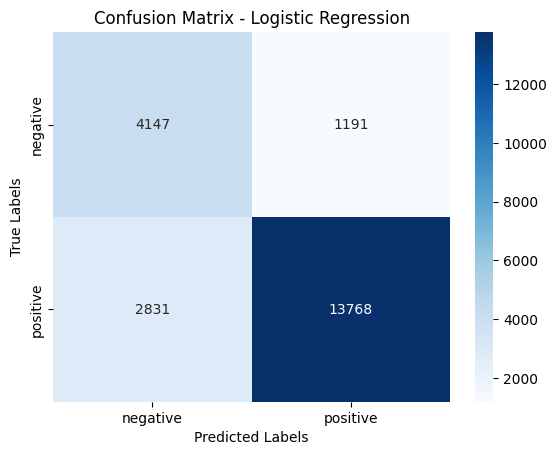

AUC-ROC (Logistic Regression): 0.8887444094586405


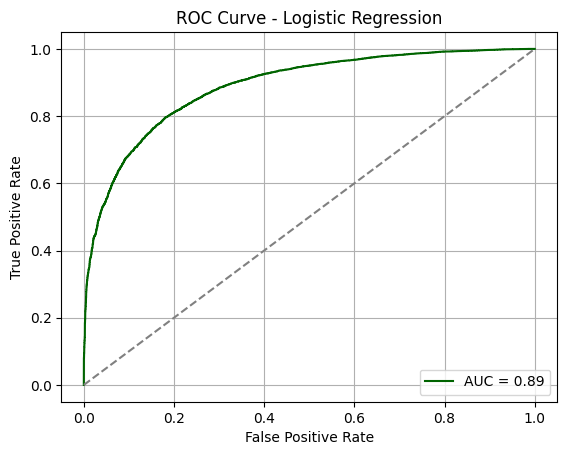

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_resampled, y_resampled)

# Dự đoán nhãn
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Tính AUC-ROC
# Mã hóa nhãn chuỗi thành số
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)

# Lấy xác suất dự đoán cho lớp positive (1)
y_proba = model.predict_proba(X_test)[:, 1]

# Tính AUC
auc = roc_auc_score(y_test_enc, y_proba)
print("AUC-ROC (Logistic Regression):", auc)

# Vẽ đường ROC
fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Classification Report (Random Forest with Undersampling):
               precision    recall  f1-score   support

    negative       0.82      0.63      0.71      5338
    positive       0.89      0.95      0.92     16599

    accuracy                           0.88     21937
   macro avg       0.85      0.79      0.82     21937
weighted avg       0.87      0.88      0.87     21937



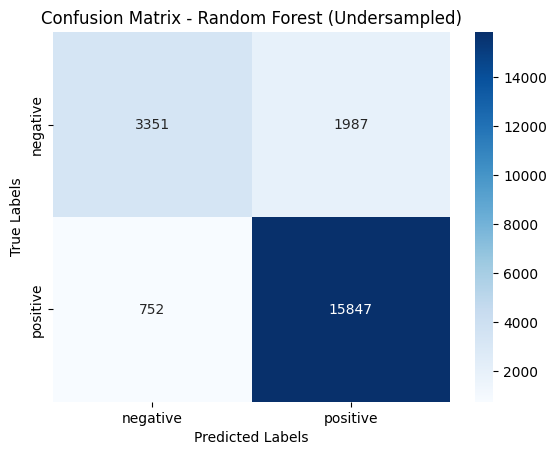

AUC-ROC (Random Forest): 0.924170024642499


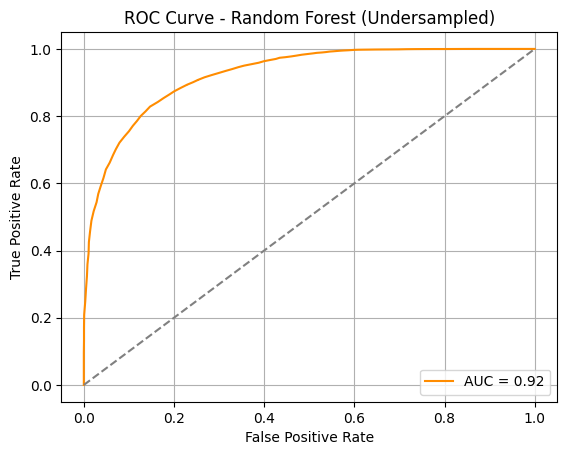

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 1: Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_resampled, y_resampled)

# Bước 2: Dự đoán nhãn
y_pred_rf = rf_model.predict(X_test)

# Bước 3: In classification report
print("Classification Report (Random Forest with Undersampling):\n", classification_report(y_test, y_pred_rf))

# Bước 4: Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=['negative', 'positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.title("Confusion Matrix - Random Forest (Undersampled)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Bước 5: Tính AUC-ROC
# Chuyển nhãn chuỗi về số (negative=0, positive=1)
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)

# Xác suất dự đoán lớp positive
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_rf = roc_auc_score(y_test_enc, y_proba_rf)
print("AUC-ROC (Random Forest):", auc_rf)

# Vẽ đường ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_enc, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Undersampled)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Classification Report (Random Forest with Custom Class Weight):
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      5338
           1       0.90      0.93      0.92     16599

    accuracy                           0.88     21937
   macro avg       0.84      0.81      0.82     21937
weighted avg       0.87      0.88      0.87     21937



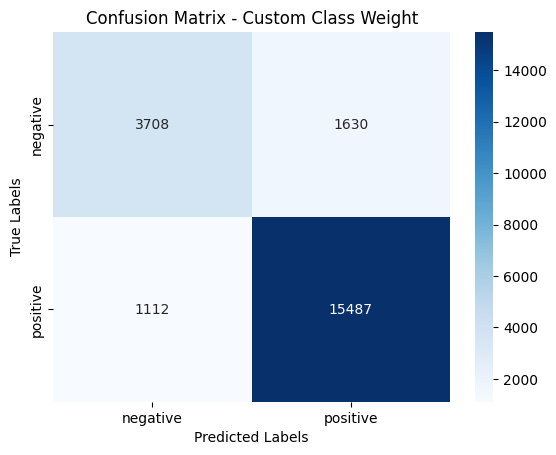

AUC-ROC (Random Forest with Custom Class Weight): 0.9274409742370058


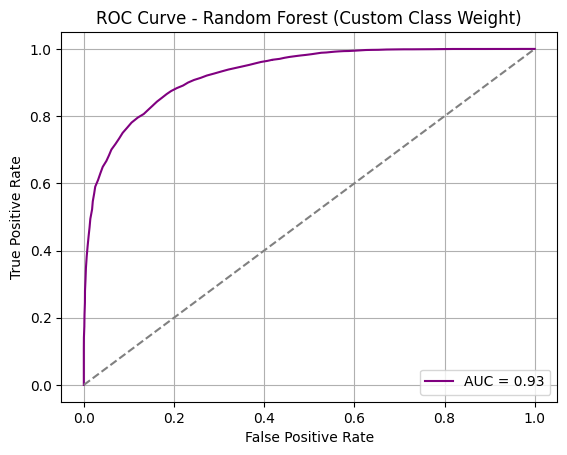

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển đổi nhãn từ chuỗi sang số
y_resampled_num = y_resampled.map({'negative': 0, 'positive': 1})
y_test_num = y_test.map({'negative': 0, 'positive': 1})

# Khởi tạo mô hình Random Forest với trọng số lớp tùy chỉnh
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 3, 1: 1})
rf_model.fit(X_resampled, y_resampled_num)

# Dự đoán nhãn
y_pred_rf = rf_model.predict(X_test)

# In classification report
print("Classification Report (Random Forest with Custom Class Weight):\n", classification_report(y_test_num, y_pred_rf))

# Vẽ confusion matrix
cm = confusion_matrix(y_test_num, y_pred_rf, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.title("Confusion Matrix - Custom Class Weight")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ===== Thêm AUC-ROC =====
# Xác suất dự đoán lớp positive (label 1)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_rf = roc_auc_score(y_test_num, y_proba_rf)
print("AUC-ROC (Random Forest with Custom Class Weight):", auc_rf)

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test_num, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.2f}", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Custom Class Weight)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Classification Report (Random Forest with balanced_subsample):
               precision    recall  f1-score   support

           0       0.82      0.63      0.71      5338
           1       0.89      0.95      0.92     16599

    accuracy                           0.87     21937
   macro avg       0.85      0.79      0.81     21937
weighted avg       0.87      0.87      0.87     21937



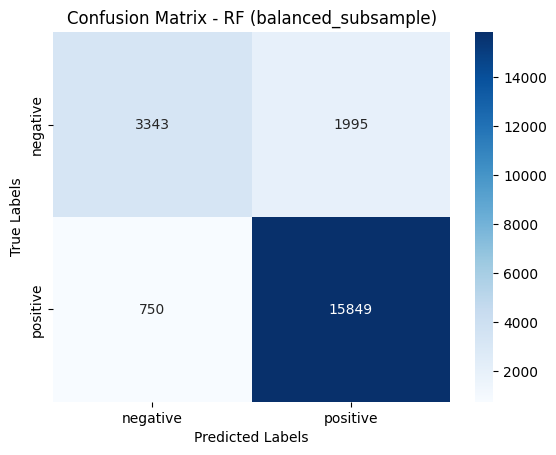

AUC-ROC (Random Forest - balanced_subsample): 0.9237514387092751


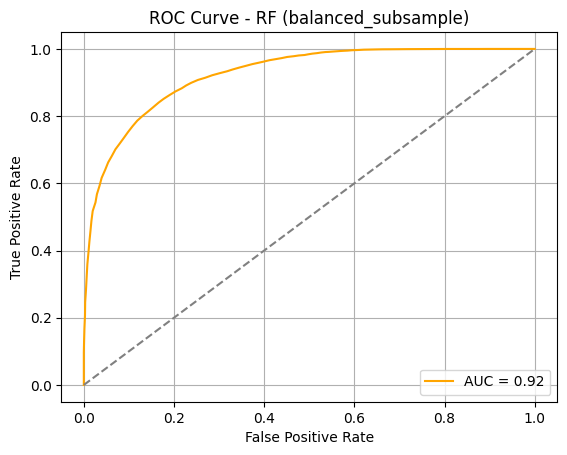

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển nhãn từ chuỗi sang số
y_resampled_num = y_resampled.map({'negative': 0, 'positive': 1})
y_test_num = y_test.map({'negative': 0, 'positive': 1})

# Khởi tạo mô hình Random Forest với class_weight = 'balanced_subsample'
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample')
rf_model.fit(X_resampled, y_resampled_num)

# Dự đoán nhãn
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Classification Report (Random Forest with balanced_subsample):\n", classification_report(y_test_num, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test_num, y_pred_rf, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.title("Confusion Matrix - RF (balanced_subsample)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ===== Thêm AUC-ROC =====
# Lấy xác suất dự đoán lớp positive (1)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_rf = roc_auc_score(y_test_num, y_proba_rf)
print("AUC-ROC (Random Forest - balanced_subsample):", auc_rf)

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test_num, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.2f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RF (balanced_subsample)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [28]:
# Giả sử y_train, y_test là chuỗi 'negative' và 'positive'
y_train_num = y_train.map({'negative': 0, 'positive': 1})
y_test_num = y_test.map({'negative': 0, 'positive': 1})

In [29]:
# Đếm số lượng mỗi lớp
from collections import Counter
counter = Counter(y_train_num)
scale_pos_weight = counter[0] / counter[1]  # số negative / số positive
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 0.32156035846072745


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      5338
           1       0.92      0.79      0.85     16599

    accuracy                           0.79     21937
   macro avg       0.73      0.79      0.75     21937
weighted avg       0.83      0.79      0.80     21937



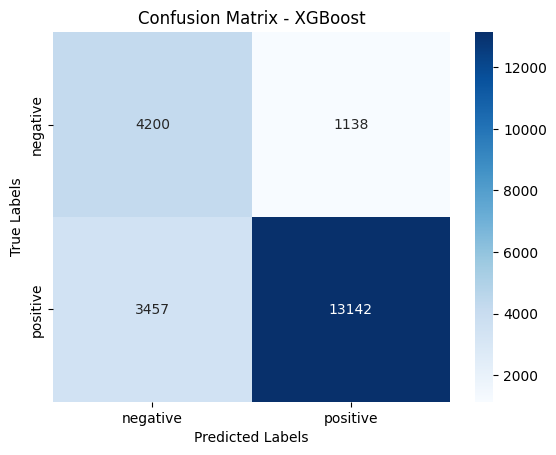

AUC-ROC (XGBoost): 0.8725695883172531


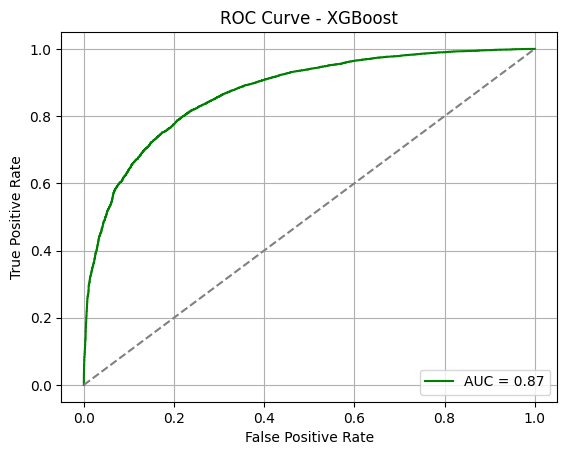

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Huấn luyện mô hình XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_num)

# Dự đoán nhãn
y_pred_xgb = xgb_model.predict(X_test)

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test_num, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test_num, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ===== Thêm AUC-ROC =====
# Lấy xác suất dự đoán lớp positive (1)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_xgb = roc_auc_score(y_test_num, y_proba_xgb)
print("AUC-ROC (XGBoost):", auc_xgb)

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test_num, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.2f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 66395, number of negative: 21350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.670210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579693
[LightGBM] [Info] Number of data points in the train set: 87745, number of used features: 7000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756681 -> initscore=1.134570
[LightGBM] [Info] Start training from score 1.134570


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.54      0.79      0.64      5338
           1       0.92      0.78      0.85     16599

    accuracy                           0.79     21937
   macro avg       0.73      0.79      0.75     21937
weighted avg       0.83      0.79      0.80     21937



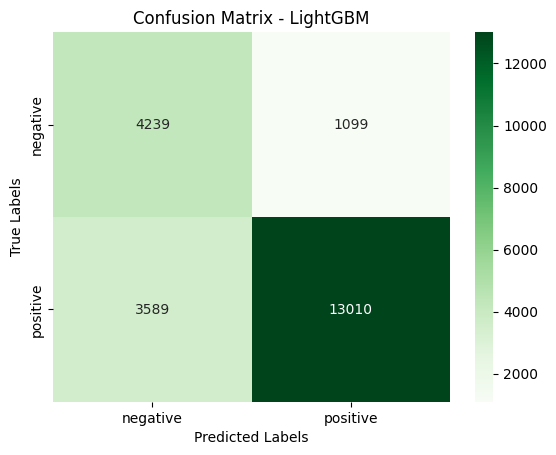

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC-ROC (LightGBM): 0.8715460678936475


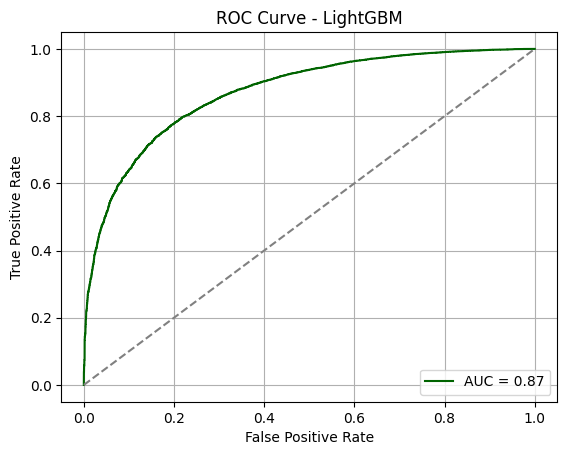

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Huấn luyện mô hình LightGBM
lgb_model = LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
lgb_model.fit(X_train, y_train_num)

# Dự đoán nhãn
y_pred_lgb = lgb_model.predict(X_test)

# Classification report
print("Classification Report (LightGBM):")
print(classification_report(y_test_num, y_pred_lgb))

# Confusion matrix
cm = confusion_matrix(y_test_num, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ===== Thêm AUC-ROC =====
# Xác suất dự đoán lớp positive (1)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Tính AUC
auc_lgb = roc_auc_score(y_test_num, y_proba_lgb)
print("AUC-ROC (LightGBM):", auc_lgb)

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test_num, y_proba_lgb)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_lgb:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
